In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [92]:
pd.set_option('display.max_rows', None)

In [2]:
import pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('data/attacks.csv',encoding= 'latin1')

df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dimension_original=df.shape

df.shape

(25723, 24)

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
df=df.drop_duplicates()

In [9]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

In [10]:
nan_cols=df.isna().mean() * 100

nan_cols[nan_cols>0]

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
Unnamed: 22               99.984157
Unnamed: 23               99.968314
dtype: float64

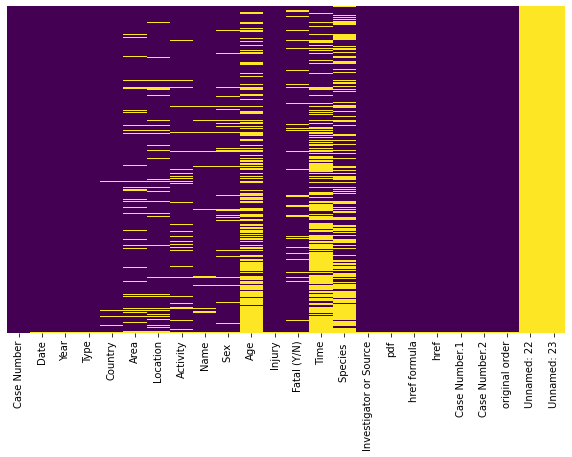

In [11]:
plt.figure(figsize=(10, 6))  

sns.heatmap(df.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [12]:
x=(df.isna().mean() * 100)>=80
df.drop(columns=x[x==True].index, inplace=True) 

In [13]:
df.shape

(6312, 22)

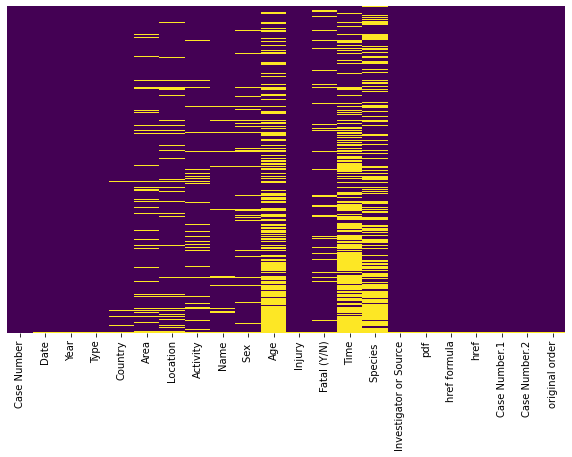

In [14]:
plt.figure(figsize=(10, 6))  

sns.heatmap(df.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [15]:
df=df.dropna(how='all')

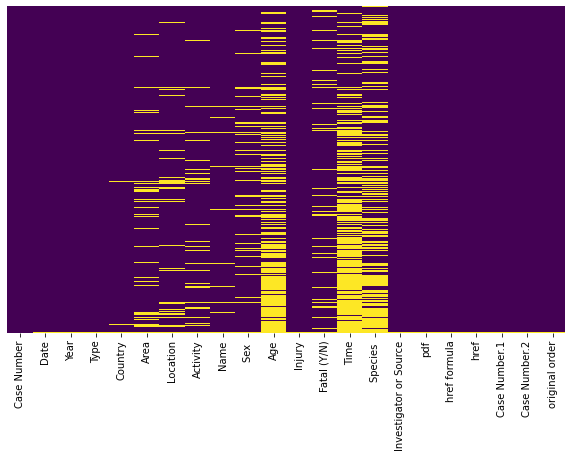

In [16]:
plt.figure(figsize=(10, 6))  

sns.heatmap(df.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [17]:
df.shape

(6311, 22)

In [18]:
df.drop_duplicates().shape==df.shape

True

In [19]:
df.shape

(6311, 22)

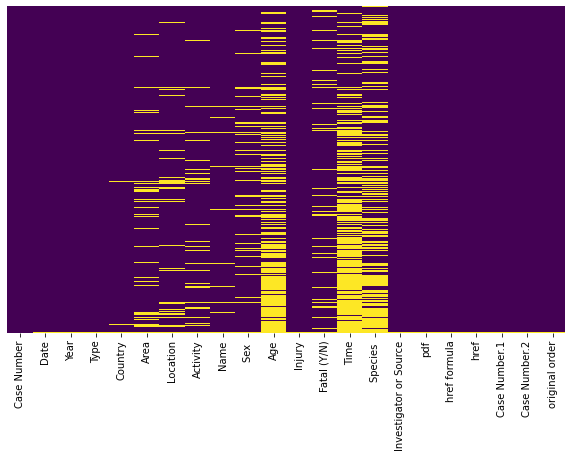

In [20]:
plt.figure(figsize=(10, 6))  

sns.heatmap(df.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [21]:
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [22]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Date                         9
Year                        11
Type                        13
Country                     59
Area                       464
Location                   549
Activity                   553
Name                       219
Sex                        574
Age                       2840
Injury                      37
Fatal (Y/N)                548
Time                      3363
Species                   2847
Investigator or Source      26
pdf                          9
href formula                10
href                         9
Case Number.1                9
Case Number.2                9
original order               2
dtype: int64

In [23]:
df[df['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


In [24]:
df['Case Number'].fillna('1905.10.06', inplace=True)

In [25]:
df.iloc[5488:5489]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,1905.10.06,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


In [26]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Date                         9
Year                        11
Type                        13
Country                     59
Area                       464
Location                   549
Activity                   553
Name                       219
Sex                        574
Age                       2840
Injury                      37
Fatal (Y/N)                548
Time                      3363
Species                   2847
Investigator or Source      26
pdf                          9
href formula                10
href                         9
Case Number.1                9
Case Number.2                9
original order               2
dtype: int64

In [27]:
df[df['Date'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
lista2=df[df['Date'].isna()].index

In [29]:
df = df.drop(lista2)

In [30]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [32]:
df.Name.fillna('unknown', inplace=True)

In [33]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [34]:
df[df['Year'].isna()]


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [35]:
mal = df[df['Year'].isna()].index

In [36]:
df.Year.fillna('2017', inplace=True)

In [37]:
Años=['2017','1836']
df.loc[mal,'Year']=Años

In [38]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [39]:
df.Type.fillna('unknown', inplace=True)
df.Country.fillna('unknown', inplace=True)
df.Area.fillna('unknown', inplace=True)
df.Location.fillna('unknown', inplace=True)
df.Activity.fillna('unknown', inplace=True)
df.Age.fillna('unknown', inplace=True)

In [40]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Sex                        565
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [41]:
df['Sex '].fillna('unknown', inplace=True)

In [42]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [44]:
df.Injury

0       No injury to occupant, outrigger canoe and pad...
1                              Minor injury to left thigh
2            Injury to left lower leg from surfboard skeg
3                               Minor injury to lower leg
4       Lacerations to leg & hand shark PROVOKED INCIDENT
                              ...                        
6297                                                FATAL
6298                                                FATAL
6299                                                FATAL
6300                                                FATAL
6301    FATAL. "Shark bit him in half, carrying away t...
Name: Injury, Length: 6302, dtype: object

In [45]:
df.Injury.fillna('unknown', inplace=True)

In [46]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [47]:
df['Fatal (Y/N)']

0       N
1       N
2       N
3       N
4       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: Fatal (Y/N), Length: 6302, dtype: object

In [48]:
df['Fatal (Y/N)'].fillna('unknown', inplace=True)

In [49]:
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [50]:
df['Fatal (Y/N)'].replace(['UNKNOWN', ' N', 'M','2017','N ','y'],
                  ['unknown','N','unknown','unknown','N','Y'], inplace=True)

In [51]:
df['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
unknown     612
Name: Fatal (Y/N), dtype: int64

In [52]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [53]:
df['href formula']

0       http://sharkattackfile.net/spreadsheets/pdf_di...
1       http://sharkattackfile.net/spreadsheets/pdf_di...
2       http://sharkattackfile.net/spreadsheets/pdf_di...
3       http://sharkattackfile.net/spreadsheets/pdf_di...
4       http://sharkattackfile.net/spreadsheets/pdf_di...
                              ...                        
6297    http://sharkattackfile.net/spreadsheets/pdf_di...
6298    http://sharkattackfile.net/spreadsheets/pdf_di...
6299    http://sharkattackfile.net/spreadsheets/pdf_di...
6300    http://sharkattackfile.net/spreadsheets/pdf_di...
6301    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href formula, Length: 6302, dtype: object

In [54]:
df[df['href formula'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3244,1975.01.19,19-Jan-1975,1975.0,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,...,Y,NaN,NaN,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3059.0


In [55]:
df['href formula'].fillna('unknown', inplace=True)

In [56]:
df.Time

0               18h00
1       14h00  -15h00
2               07h45
3                 NaN
4                 NaN
            ...      
6297              NaN
6298              NaN
6299              NaN
6300              NaN
6301              NaN
Name: Time, Length: 6302, dtype: object

In [57]:
df.Time.fillna('unknown', inplace=True)

In [58]:
df['Species ']

0           White shark
1                   NaN
2                   NaN
3             2 m shark
4       Tiger shark, 3m
             ...       
6297                NaN
6298                NaN
6299                NaN
6300                NaN
6301                NaN
Name: Species , Length: 6302, dtype: object

In [59]:
df['Species '].fillna('unknown', inplace=True)

In [60]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

Investigator or Source    17
dtype: int64

In [61]:
df['Investigator or Source']

0                            R. Collier, GSAF
1              K.McMurray, TrackingSharks.com
2              K.McMurray, TrackingSharks.com
3                              B. Myatt, GSAF
4                                   A .Kipper
                        ...                  
6297         H. Taunton; N. Bartlett,  p. 234
6298    H. Taunton; N. Bartlett,  pp. 233-234
6299     F. Schwartz, p.23; C. Creswell, GSAF
6300                      The Sun, 10/20/1938
6301                               S.W. Baker
Name: Investigator or Source, Length: 6302, dtype: object

In [62]:
df['Investigator or Source'].fillna('unknown', inplace=True)

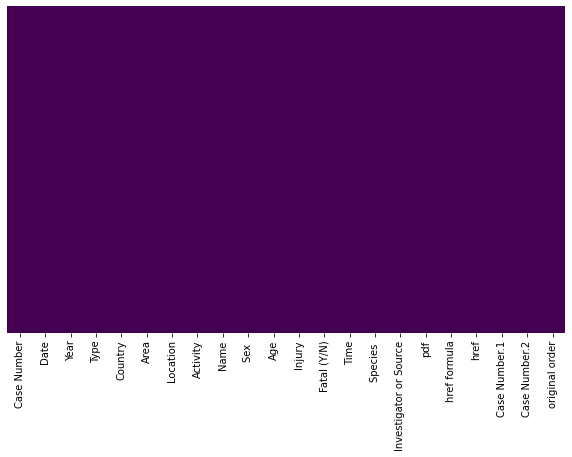

In [63]:
plt.figure(figsize=(10, 6))  

sns.heatmap(df.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [64]:
df['Sex ']

0       F
1       F
2       M
3       M
4       M
       ..
6297    M
6298    M
6299    M
6300    M
6301    M
Name: Sex , Length: 6302, dtype: object

In [65]:
df['Sex '].value_counts()

M          5094
F           637
unknown     565
M             2
N             2
lli           1
.             1
Name: Sex , dtype: int64

In [66]:
df['Sex '].replace(['M ', 'N', 'lli','.'],
                  ['M','unknown','unknown','unknown'], inplace=True)

In [67]:
df['Sex '].value_counts()

M          5096
F           637
unknown     569
Name: Sex , dtype: int64

In [68]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [69]:
df['Species '].value_counts()

unknown                                                                                                                          2838
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Invalid                                                                                                                           102
Shark involvement not confirmed                                                                                                    88
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                                      

In [70]:
#pd.set_option('display.max_rows', None)

In [71]:
keyword='Invalid'

select=df[df['Species '].str.contains(keyword, regex=True)]

select

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
13,2018.05.13.a,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,...,N,08h15,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0
226,2016.09.00,Sep-2016,2016.0,Invalid,MEXICO,unknown,Guadalupe Island,Cage Diving,unknown,unknown,...,unknown,unknown,Invalid,K. Yonker,2016.09.00-Breach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.00,2016.09.00,6077.0
578,2014.03.13,13-Mar-2014,2014.0,Invalid,CAYMAN ISLANDS,unknown,unknown,Scuba diving / culling lionfish,Jason Dimitri,M,...,unknown,unknown,Invalid,"You Tube, posted 4/12/2014",2014.03.13-Dimitri.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.03.13,2014.03.13,5725.0
676,2013.05.08.b,08-May-2013,2013.0,Invalid,USA,California,"Tourmaline Surf Park, San Diego County",Surfing,Brandon Beaver,M,...,unknown,unknown,Invalid,"Sacramento Bee, 6/4/2013",2013.05.08.b-Beaver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.08.b,2013.05.08.b,5627.0
926,2011.05.07.R,Reported 07-May-2011,2011.0,Invalid,UNITED ARAB EMIRATES (UAE),Umm al Qaywayan Province,Khor Fakkan,Fishing,Mustafa Al Hammadi,M,...,unknown,unknown,Invalid,"Emirates 24/7 News, 5/7/2011",2011.05.07.R-UAE.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.05.07.R,2011.05.07.R,5377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,1855.00.00,Circa 1855,1855.0,Invalid,AUSTRALIA,New South Wales,Sydney Harbor,Swimming,C.T. Clark,M,...,unknown,unknown,Invalid,"Brighton Southern Cross, 2/13/1915",1855.00.00-Clark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1855.00.00,1855.00.00,298.0
6019,1852.07.28,28-Jul-1952,1852.0,Invalid,ATLANTIC OCEAN,unknown,unknown,unknown,Karen Bredesen Stræte,F,...,unknown,unknown,Invalid,Norway Heritage,1852.07.28-Karen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1852.07.28,1852.07.28,284.0
6088,1831.01.22.R,Reported 22- Jan-1831,1831.0,Invalid,AUSTRALIA,Tasmania,Hobart,"Boat capsized, clinging to line",Robert Dudlow,M,...,unknown,unknown,Invalid,"C. Black, GSAF; Sydney Gazette, 1/22/1831",1831.01.22.R-Dudlow.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1831.01.22.R,1831.01.22.R,215.0
6110,1819.07.08.R,Reported 08-Jul-1819,1819.0,Invalid,SPAIN,unknown,Cadiz,unknown,male,M,...,unknown,unknown,Invalid,"C. Moore, GSAF",1819.07.08.R-Cadiz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1819.07.08.R,1819.07.08.R,193.0


In [72]:

df.drop(select.index, axis=0, inplace=True)


In [73]:
select=df[df['Species '].str.contains(keyword, regex=True)]

select

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


In [74]:
import regex as re
def limpiar_CaseNumber(x):
    x = re.findall('\d+.\d+.\d+', x)
    x = ''.join(x)
    return x

In [75]:
df['Case Number'] = df['Case Number'].apply(limpiar_CaseNumber)

In [76]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,unknown,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,...,Y,unknown,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,unknown,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,,1883-1889,0.0,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,...,Y,unknown,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [77]:
df.Date=df['Case Number']

In [78]:
df['Case Number.1']=df['Case Number']

In [79]:
df['Case Number.2']=df['Case Number']

In [80]:
df


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,,,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,unknown,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,,,6.0
6298,,,0.0,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,...,Y,unknown,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,,,5.0
6299,,,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,unknown,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,,,4.0
6300,,,0.0,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,...,Y,unknown,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,,,3.0


In [97]:
df['Sex '].unique()

['F' 'M' 'unknown']


In [98]:
x = df.Activity.unique()

In [100]:
len(x)

1508

In [106]:
def cleanact(x):
    dicc_actividades = {"Fishing":re.search(".*[Ff](ishing|ISHING).*",str(x)),
          "Swimming":re.search(".*[Ss](wimming|WIMMing).*",str(x)),
          "Kite":re.search(".*[Kk](ite|ITE).*",str(x)),
          "Walking":re.search(".*[Ww](alking|ALKING).*",str(x)),
          "Boogie Board":re.search(".*[Bb](oogie|OOGIE).*",str(x)),
          "Body Boarding":re.search(".*[Bb](ody|ODY).*",str(x)),
          "Wind Surfing":re.search(".*[wW](ind|IND).*",str(x)),
          "Boat":re.search(".*[Bb](oat|OAT).*",str(x)),
          "Interact with sharks":re.search(".*[Ss](hark|HARK).*",str(x)),
          "Diving":re.search(".*[Dd](iving|IVING).*",str(x)),	
          "Standing in water":re.search(".*[Ss](tand|TAND).*",str(x)),
          "Paddling":re.search(".*[Pp](addl|ADDL).*",str(x)),
          "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
          "OverBoard":re.search(".*[Oo](verb|VERB).*",str(x)),
          "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
          "Floating":re.search(".*[Ff](loat|LOAT).*",str(x)),
          "Jumping":re.search(".*[Jj](ump|UMP).*",str(x))}
    for key,values in dicc_actividades.items():
        if values:
            return key
    return "other"

In [108]:
df.Activity=df.Activity.apply(cleanact)


In [110]:
df.Activity.unique()

array(['Paddling', 'Standing in water', 'other', 'Diving', 'Kite',
       'Swimming', 'Fishing', 'Walking', 'Interact with sharks',
       'Boogie Board', 'Body Boarding', 'Wind Surfing', 'Boat', 'Bathing',
       'Floating', 'Jumping', 'OverBoard'], dtype=object)

In [111]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,...,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,male,M,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [118]:
df.Year = df.Year.astype(int)

In [120]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,...,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,male,M,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [122]:
pd.crosstab(index=df['Sex '], columns='count')

col_0,count
Sex,
F,630
M,5014
unknown,555


In [140]:
pd.crosstab(index=df['Year'], columns='count')


col_0,count
Year,
0,124
5,1
77,1
500,1
1543,1
1554,1
1555,1
1580,1
1595,1


In [141]:
pd.crosstab(index=df['Activity'], columns='count')

col_0,count
Activity,
Bathing,184
Boat,101
Body Boarding,136
Boogie Board,50
Diving,495
Fishing,1140
Floating,45
Interact with sharks,152
Jumping,15


In [128]:
pd.crosstab(index=df['Country'], columns='count')

col_0,count
Country,
PHILIPPINES,1
TONGA,3
ADMIRALTY ISLANDS,1
AFRICA,1
ALGERIA,1
AMERICAN SAMOA,3
ANDAMAN / NICOBAR ISLANDAS,1
ANDAMAN ISLANDS,1
ANGOLA,1


In [142]:
pd.crosstab(index=df['Fatal (Y/N)'], columns='count')

col_0,count
Fatal (Y/N),
N,4300
Y,1389
unknown,510
